In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('fraud_prediction.csv')

In [4]:
from sklearn.model_selection import train_test_split

features = data.drop('isFraud', axis = 1).values
target = data['isFraud'].values 

x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.30, random_state=42, stratify=target)


In [5]:
from sklearn.naive_bayes import GaussianNB


nb_classifier = GaussianNB()


nb_classifier.fit(x_train, y_train)

#se extrae precision de algoritmo naive bayes

nb_classifier.score(x_test, y_test)

0.9798927613941019

In [7]:
from sklearn.svm import LinearSVC

#se inicializa SVC

svm = LinearSVC(random_state = 50, max_iter=10000)


svm.fit(x_train, y_train)

#valor de precision

svm.score(x_test, y_test)

c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.7599317572507921

c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `

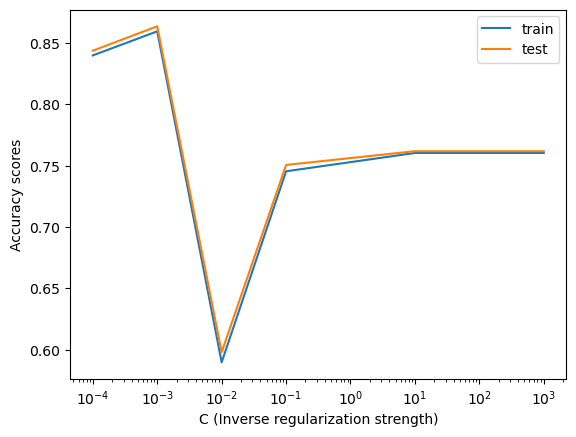

In [8]:
import matplotlib.pyplot as plt 
from sklearn.svm import LinearSVC

training_scores = []
testing_scores = []

param_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Se evalua el valor de cada parametro

for param in param_list:
    
    
    svm = LinearSVC(C = param, random_state = 42)
    svm.fit(x_train, y_train)
    
    training_scores.append(svm.score(x_train, y_train) )
    testing_scores.append(svm.score(x_test, y_test) )
    
plt.semilogx(param_list, training_scores, param_list, testing_scores)
plt.legend(("train", "test"))
plt.ylabel('Accuracy scores')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

In [10]:
from sklearn.model_selection import GridSearchCV


svm = LinearSVC(random_state = 50)

#se busca el mejor parametro para SVC

grid = GridSearchCV(svm, {'C':[0.00001, 0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(x_train, y_train)


print("The best value of the inverse regularization strength is:", grid.best_params_)

c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `

The best value of the inverse regularization strength is: {'C': 1e-05}


c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [11]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


order = [('scaler', StandardScaler()), ('SVM', LinearSVC(C = 0.1, random_state = 50))]

pipeline = Pipeline(order)


svm_scaled = pipeline.fit(x_train, y_train)

svm_scaled.score(x_test, y_test)

c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\Incluit\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


0.996953448696076